### Some graph tests with entities (assume that we have topics)

In [2]:
import spacy
import ast
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
nlp = spacy.load("nl_core_news_lg")

In [131]:
df_1 = pd.read_csv('withnames_topics.csv') #Kate's file" spacy entities + added topic column
df = pd.read_csv('document_entities_flair.csv') #bart file with flair entities

In [132]:
# final_dataset  = pd.read_csv('api_documents.csv') #final dataset with all the columns
# final_dataset.head()

In [133]:
#get to the separate dataframe topic column from df_1 to add this to bart file
topics = df_1[['topic']]
topics.value_counts()

topic
-1       979
 0       252
 1       106
 2        71
 3        67
        ... 
 151      11
 152      11
 153      10
 154      10
 155      10
Name: count, Length: 157, dtype: int64

In [134]:
df.head()

,Unnamed: 0.1,Unnamed: 0,text,title,datum,vergaderjaar,kamerstuk,len,sentences,entities
0,0,0,\n25 295Infectieziektenbestrijdingnr. 1BRIEF V...,"Kamerstuk 25295, nr. 1 | Overheid.nl > Officië...",14-04-1997,1996-1997,Kamerstuk 25295 nr. 1,1683,"['\n25 295Infectieziektenbestrijdingnr.', '1BR...","[['VOLKSGEZONDHEID', 'ORG'], ['WELZIJN EN SPOR..."
1,1,1,\n25 295Infectieziektenbestrijdingnr. 2NOTAInh...,"Kamerstuk 25295, nr. 2 | Overheid.nl > Officië...",14-04-1997,1996-1997,Kamerstuk 25295 nr. 2,86555,"['\n25 295Infectieziektenbestrijdingnr.', '2NO...",[['Gezondheidsraadadviezen154.1.Tuberculose154...
2,2,2,\n25 295Infectieziektenbestrijdingnr. 3BRIEF V...,"Kamerstuk 25295, nr. 3 | Overheid.nl > Officië...",28-06-2001,2000-2001,Kamerstuk 25295 nr. 3,28681,"['\n25 295Infectieziektenbestrijdingnr.', '3BR...","[['VOLKSGEZONDHEID', 'ORG'], ['WELZIJN EN SPOR..."
3,3,3,\n25 295Infectieziektenbestrijdingnr. 4BRIEF V...,"Kamerstuk 25295, nr. 4 | Overheid.nl > Officië...",15-08-2001,2000-2001,Kamerstuk 25295 nr. 4,4920,"['\n25 295Infectieziektenbestrijdingnr.', '4BR...","[['VOLKSGEZONDHEID', 'ORG'], ['WELZIJN EN SPOR..."
4,4,4,\n25 295Infectieziektenbestrijdingnr. 5BRIEF V...,"Kamerstuk 25295, nr. 5 | Overheid.nl > Officië...",06-03-2002,2001-2002,Kamerstuk 25295 nr. 5,2966,"['\n25 295Infectieziektenbestrijdingnr.', '5BR...","[['VOLKSGEZONDHEID', 'ORG'], ['WELZIJN EN SPOR..."


In [135]:
# convert string representations of lists to lists of sublists using ast.literal_eval()
df['entities'] = df['entities'].apply(ast.literal_eval)

# extract 'PER' entities from each list of sublists
per_lst = []
for lst in df['entities']:
    per_lst.append([sublist[0] for sublist in lst if sublist[1] == 'PER'])

# add the list of 'PER' entities as a new column in the DataFrame
df['PER'] = per_lst


In [136]:
df['PER'][11]

['Buijs', 'Buijs.1Wat', 'Buijs', 'Buijs', 'IZ', 'F. Hoogervorst']

In [140]:
#add topics column to df
df['topic'] = topics

In [143]:
def top_3_names(data):
    top_names = {}
    for row in data.itertuples(index=False):
        topic = row.topic
        names = row.PER
        if topic not in top_names:
            top_names[topic] = {}
        for name in names:
            if name not in top_names[topic]:
                top_names[topic][name] = 0
            top_names[topic][name] += 1
    for topic in top_names:
        top_names[topic] = [name for name, count in sorted(top_names[topic].items(), key=lambda x: x[1], reverse=True)[:3]]
    return top_names

In [144]:
top_3_names(df)

{-1: ['Staatssecretaris', 'Minister', 'Van Gerven'],
 138: ['Sanquin', 'E.I', 'Schippers'],
 101: ['Paternotte', 'Jetten', 'Asscher'],
 13: ['Janssen', 'H.M. de Jonge', 'Bikker'],
 14: ['P. Blokhuis', 'Veldman', 'GR'],
 20: ['E.I', 'F. HoogervorstXNoot1Ter', 'Van Esch'],
 42: ['H.M. de Jonge', 'Buijs', 'E.I'],
 54: ['Minister', 'Long Covid', 'Paulusma'],
 25: ['H.M. de Jonge', 'Krol', 'Marijnissen'],
 31: ['Schippers', 'Bruins Slot', 'Minister'],
 140: ['M.C.G', 'I.K', 'van Engelshoven'],
 96: ['H.M. de Jonge', 'E.I', 'Schippers'],
 111: ['C.S', 'KUZU', 'VAN DER PLAS'],
 150: ['B.J', 'M.J. van Rijn', 'Bruins'],
 6: ['B.J', 'Bruins', 'Minister'],
 19: ['Minister', 'Bikker', 'Paternotte'],
 29: ['C.S', 'PATERNOTTE', 'Paternotte Van den Berg'],
 64: ['Van Haga Hiddema', 'HAGA', 'HIDDEMA'],
 114: ['Van Gerven', 'GERVEN', 'VAN'],
 149: ['VAN GERVEN', 'Van Kooten-Arissen Van Gerven', 'GERVEN'],
 18: ['Krol Marijnissen', 'ASSCHER', 'C.S'],
 86: ['AZARKAN', 'Minister-President', 'Amhaouch'],
 

In [179]:

#make from list string in PER column
df['PER_str'] = df['PER'].apply(lambda x: str(x))
df['PER_str'] = df['PER_str'].apply(lambda x: x[1:-1])
df.head()

,Unnamed: 0.1,Unnamed: 0,text,title,datum,vergaderjaar,kamerstuk,len,sentences,entities,PER,topic,PER_str
0,0,0,\n25 295Infectieziektenbestrijdingnr. 1BRIEF V...,"Kamerstuk 25295, nr. 1 | Overheid.nl > Officië...",14-04-1997,1996-1997,Kamerstuk 25295 nr. 1,1683,"['\n25 295Infectieziektenbestrijdingnr.', '1BR...","[[VOLKSGEZONDHEID, ORG], [WELZIJN EN SPORTAan,...",[],-1,
1,1,1,\n25 295Infectieziektenbestrijdingnr. 2NOTAInh...,"Kamerstuk 25295, nr. 2 | Overheid.nl > Officië...",14-04-1997,1996-1997,Kamerstuk 25295 nr. 2,86555,"['\n25 295Infectieziektenbestrijdingnr.', '2NO...",[[Gezondheidsraadadviezen154.1.Tuberculose154....,[],138,
2,2,2,\n25 295Infectieziektenbestrijdingnr. 3BRIEF V...,"Kamerstuk 25295, nr. 3 | Overheid.nl > Officië...",28-06-2001,2000-2001,Kamerstuk 25295 nr. 3,28681,"['\n25 295Infectieziektenbestrijdingnr.', '3BR...","[[VOLKSGEZONDHEID, ORG], [WELZIJN EN SPORTAan,...","[Berenschot, Berenschot, Berenschot, DGV, Bere...",-1,"'Berenschot', 'Berenschot', 'Berenschot', 'DGV..."
3,3,3,\n25 295Infectieziektenbestrijdingnr. 4BRIEF V...,"Kamerstuk 25295, nr. 4 | Overheid.nl > Officië...",15-08-2001,2000-2001,Kamerstuk 25295 nr. 4,4920,"['\n25 295Infectieziektenbestrijdingnr.', '4BR...","[[VOLKSGEZONDHEID, ORG], [WELZIJN EN SPORTAan,...","[GZB, GZ, OMT]",101,"'GZB', 'GZ', 'OMT'"
4,4,4,\n25 295Infectieziektenbestrijdingnr. 5BRIEF V...,"Kamerstuk 25295, nr. 5 | Overheid.nl > Officië...",06-03-2002,2001-2002,Kamerstuk 25295 nr. 5,2966,"['\n25 295Infectieziektenbestrijdingnr.', '5BR...","[[VOLKSGEZONDHEID, ORG], [WELZIJN EN SPORTAan,...",[],-1,


In [114]:
#spacy code to ectract entities
# def extract_entities(doc):
#     entities = []
#     for ent in doc.ents:
#         if ent.label_ == "PERSON":
#             entities.append(ent.text)
#     return entities

#check if it works to get unique entities
# def extract_unique_entities(doc):
#     entities = []
#     for ent in doc.ents:
#         if ent.label_ == "PERSON":
#             if ent.text not in entities:
#                 entities.append(ent.text)
#     return entities

#df['entities'] = df['text'].apply(lambda x: extract_entities(nlp(x)))

In [115]:
#bert model to get topic for each document

# df.text = df.text.str.replace('\n', ' ')
# df.text = df.text.str.replace('\t', ' ')
# df.text = df.text.str.replace('\r', ' ')
# df.text = df.apply(lambda row: re.sub(r"http\S+", "", row.text).lower(), 1)
# df.text = df.apply(lambda row: " ".join(re.sub("[^a-zA-Z]+", " ", row.text).split()), 1)
# timestamps = df.datum.to_list()
# doc_texts = df.text.to_list()

Bertopic code to get topics for each document (also I run once and added this column to test futher)

In [149]:
from bertopic import BERTopic

model = BERTopic()
# topic_model = BERTopic(verbose=True)
# topics, probs = topic_model.fit_transform(doc_texts)

In [117]:
# len(topic_model.get_topic_freq())

In [38]:
# topics_over_time = topic_model.topics_over_time(doc_texts, timestamps, datetime_format='mixed', nr_bins=20)

In [39]:
# topic_model.visualize_topics_over_time(topics_over_time, topics=[1,2,3,4,5,6,7])

In [40]:
# topic_model.get_document_info(doc_texts)

In [41]:
# #add a column with the topic number to the dataframe
# df['topic'] = topics
# df['prob'] = probs
# df.to_csv('withnames_topics.csv', index=False)

In [42]:
#get the top 10 words for each topic
# topic_model.get_topic(12)

In [178]:
df.head()

,Unnamed: 0.1,Unnamed: 0,text,title,datum,vergaderjaar,kamerstuk,len,sentences,entities,PER,topic
0,0,0,\n25 295Infectieziektenbestrijdingnr. 1BRIEF V...,"Kamerstuk 25295, nr. 1 | Overheid.nl > Officië...",14-04-1997,1996-1997,Kamerstuk 25295 nr. 1,1683,"['\n25 295Infectieziektenbestrijdingnr.', '1BR...","[[VOLKSGEZONDHEID, ORG], [WELZIJN EN SPORTAan,...",[],-1
1,1,1,\n25 295Infectieziektenbestrijdingnr. 2NOTAInh...,"Kamerstuk 25295, nr. 2 | Overheid.nl > Officië...",14-04-1997,1996-1997,Kamerstuk 25295 nr. 2,86555,"['\n25 295Infectieziektenbestrijdingnr.', '2NO...",[[Gezondheidsraadadviezen154.1.Tuberculose154....,[],138
2,2,2,\n25 295Infectieziektenbestrijdingnr. 3BRIEF V...,"Kamerstuk 25295, nr. 3 | Overheid.nl > Officië...",28-06-2001,2000-2001,Kamerstuk 25295 nr. 3,28681,"['\n25 295Infectieziektenbestrijdingnr.', '3BR...","[[VOLKSGEZONDHEID, ORG], [WELZIJN EN SPORTAan,...","[Berenschot, Berenschot, Berenschot, DGV, Bere...",-1
3,3,3,\n25 295Infectieziektenbestrijdingnr. 4BRIEF V...,"Kamerstuk 25295, nr. 4 | Overheid.nl > Officië...",15-08-2001,2000-2001,Kamerstuk 25295 nr. 4,4920,"['\n25 295Infectieziektenbestrijdingnr.', '4BR...","[[VOLKSGEZONDHEID, ORG], [WELZIJN EN SPORTAan,...","[GZB, GZ, OMT]",101
4,4,4,\n25 295Infectieziektenbestrijdingnr. 5BRIEF V...,"Kamerstuk 25295, nr. 5 | Overheid.nl > Officië...",06-03-2002,2001-2002,Kamerstuk 25295 nr. 5,2966,"['\n25 295Infectieziektenbestrijdingnr.', '5BR...","[[VOLKSGEZONDHEID, ORG], [WELZIJN EN SPORTAan,...",[],-1


In [192]:
#remove -1 topics
df_3 = df[df.topic != -1]
#count the number of documents per topic
df_3.topic.value_counts()
#get a new dataframe with 0,1,2,3,4 topics
df_3 = df_3.head(10)



Creating a social graph:

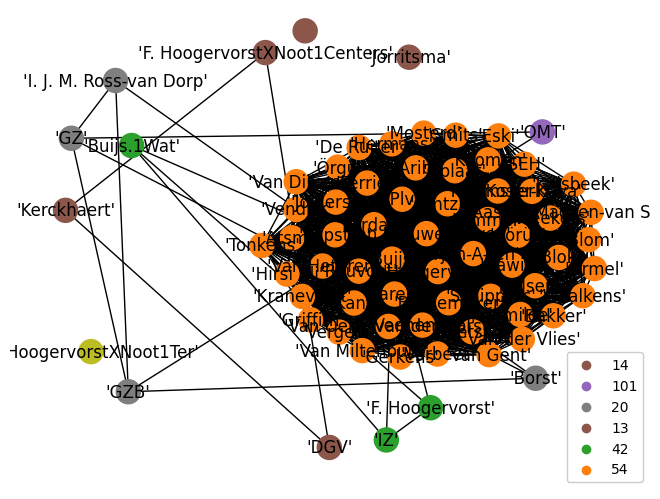

In [193]:
# Read in the dataframe
# df_3 = df.head(15)

# Create an empty graph
G = nx.Graph()

# Iterate through each row in the dataframe
for index, row in df_3.iterrows():
    # Extract the text, topic, and people columns
    text = row["text"]
    topic = row["topic"]
    people = row["PER_str"]

    # Split the people column into a list of names
    names = list(set(people.split(", ")))

    # For each name, add a node if it doesn't exist, or use the existing node if it does
    for name in names:
        if name not in G.nodes:
            G.add_node(name)

    # Add the topic attribute to the node
        G.nodes[name]["topic"] = topic

    # For each pair of names, add an edge if they are unique
    for i in range(len(names)):
        for j in range(i+1, len(names)):
            if not G.has_edge(names[i], names[j]):
                G.add_edge(names[i], names[j])

    # For each topic, assign a unique color to all associated names
    color = "C{}".format(len(G._node) % 10)
    for name in names:
        if name in G.nodes:
            G.nodes[name]["color"] = color

# Draw the graph
pos = nx.spring_layout(G, seed=42,  k=2)
node_colors = [G.nodes[name]["color"] for name in G.nodes]
nx.draw(G, pos, node_color=node_colors, with_labels=True)

# Create the legend
handles = []
labels = []
for node in G.nodes:
    color = G.nodes[node]["color"]
    topic = G.nodes[node]["topic"] if "topic" in G.nodes[node] else "Unknown"
    if topic not in labels:
        labels.append(topic)
        handle = plt.scatter([], [], c=color, label=topic)
        handles.append(handle)
plt.legend(handles, labels, loc="lower right", frameon=True, framealpha=1)

# Show the plot
plt.show()
